###  print out structures

In [1]:
import random
import numpy as np
import pprint
from mycrograd_debug.engine_debug import Value
from mycrograd_debug.nn_debug import Neuron, Layer, MLP
from mycrograd_debug.drawviz_debug import draw_dot

np.random.seed(1337)
random.seed(1337)
pp = pprint.PrettyPrinter(indent=4)


#### Neuron

number of inputs:  1
Neuron:  LinearNeuron(1)
weights:  [Value(name=v001,layernumber=L,neuronnumber=n,weightnumber=,type=w1,data=0.5, grad=0)]
b:  Value(name=v002,layernumber=L,neuronnumber=n,weightnumber=,type=b,data=0, grad=0)
b type:  b
number of parameters  2
parameters
[   Value(name=v001,layernumber=L,neuronnumber=n,weightnumber=,type=w1,data=0.5, grad=0),
    Value(name=v002,layernumber=L,neuronnumber=n,weightnumber=,type=b,data=0, grad=0)]
inputs  [Value(name=v003,layernumber=,neuronnumber=,weightnumber=,type=i,data=1, grad=0)]
number of Value objects created =  5
activation:  Value(name=v005,layernumber=L,neuronnumber=n,weightnumber=,type=a,data=0.5, grad=0)
backward mul   v001   0.00 ->   1.00 v003   0.00 ->   0.50


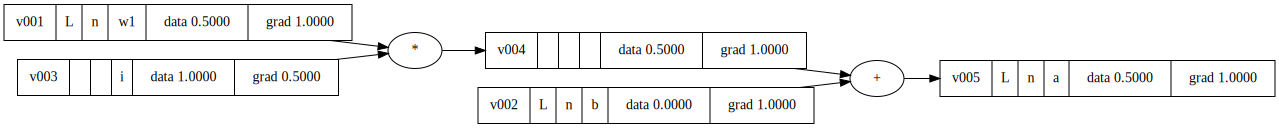

In [2]:
nin = 1  # number of inputs
nonlin = False
Value.value_counter = 0

myNeuron = Neuron(nin, nonlin=nonlin, weightsinit=2, debug_bw=True)
print("number of inputs: ", nin)
print("Neuron: ", myNeuron)
print("weights: ", myNeuron.w)
print("b: ", myNeuron.b)
print("b type: ", myNeuron.b.type)
print("number of parameters ", len(myNeuron.parameters()))
print("parameters")
pp.pprint(myNeuron.parameters())

# xinumbers= np.random.randint(1,10, size=(nin))   # inputs
xinumbers = list(range(1, nin + 1))
xinput = [Value(x, type="i") for x in xinumbers]
print("inputs ", xinput)

activation = myNeuron(xinput)
print("number of Value objects created = ", Value.value_counter)

print("activation: ", activation)
activation.backward()
draw_dot(activation)

## Gradient

activation1  Value(name=v017,layernumber=L,neuronnumber=n1,weightnumber=,type=a,data=1.4000000000000001, grad=0)
activation2  Value(name=v026,layernumber=L,neuronnumber=n2,weightnumber=,type=a,data=19.0, grad=0)
number of Value objects created =  39
loss= Value(name=v039,layernumber=,neuronnumber=,weightnumber=,type=,data=26.6, grad=0)
backward mul   v032   0.00 ->  19.00 v038   0.00 ->   1.40
backward mul   v001   0.00 ->  19.00 v009   0.00 ->   1.90
backward mul   v002   0.00 ->  38.00 v010   0.00 ->   3.80
backward mul   v003   0.00 ->  57.00 v011   0.00 ->   5.70
backward mul   v005   0.00 ->   7.00 v018   0.00 ->   0.70
backward mul   v006   0.00 ->   8.40 v019   0.00 ->   1.40
backward mul   v007   0.00 ->   9.80 v020   0.00 ->   2.10


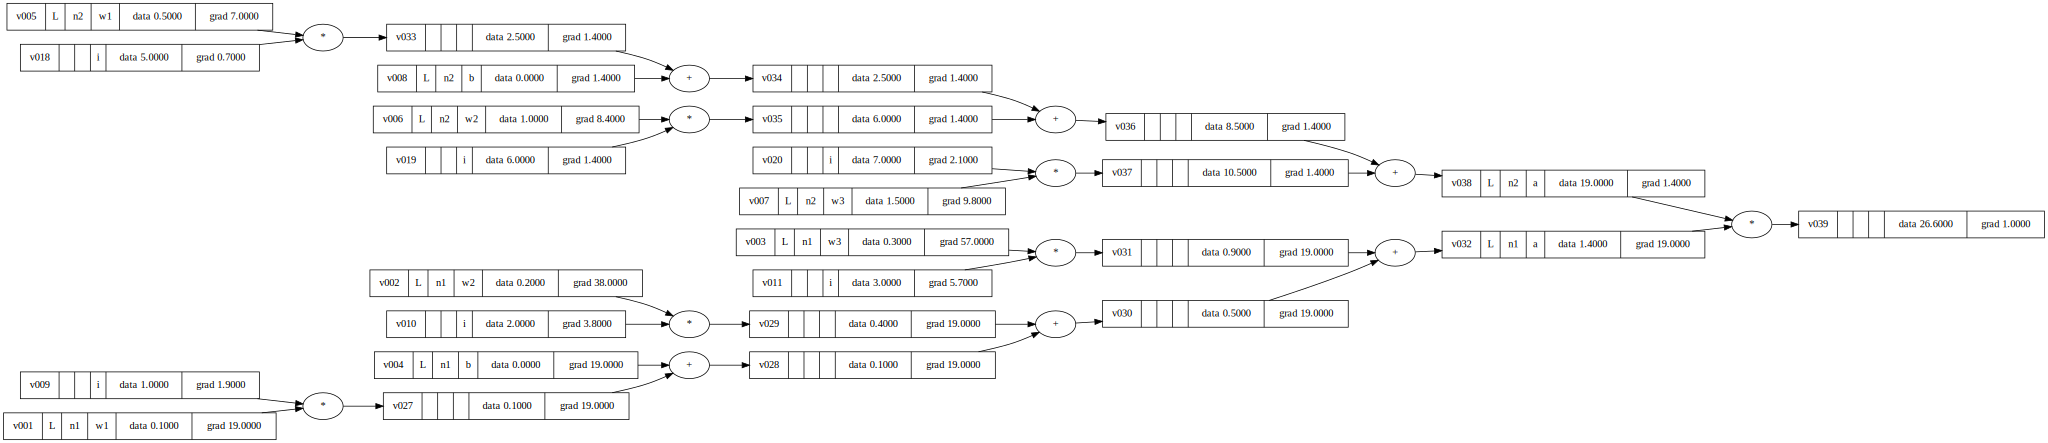

In [3]:
nin = 3  # number of inputs
Value.value_counter = 0
nonlin = False
print_params=False
print_inputs=False

myNeuron1 = Neuron(nin, neuronnumber="n1", nonlin=nonlin, weightsinit=1, debug_bw=True)
myNeuron2 = Neuron(nin, neuronnumber="n2", nonlin=nonlin, weightsinit=2, debug_bw=True)
if print_params:
    pp.pprint(myNeuron1.parameters())
    pp.pprint(myNeuron2.parameters())

xinumbers1 = list(range(1, nin + 1))
xinput1 = [Value(x, type="i") for x in xinumbers1]
if print_inputs:
    print("inputs1")
    pp.pprint(xinput1)

activation1 = myNeuron1(xinput1)
print("activation1 ", activation1)

xinumbers2 = list(range(5, 5+nin ))
xinput2 = [Value(x, type="i") for x in xinumbers2]
if print_inputs:
    print("inputs2")
    pp.pprint(xinput2)

activation2 = myNeuron2(xinput2)
print("activation2 ", activation2)

loss = myNeuron1(xinput1) * myNeuron2(xinput2)
print("number of Value objects created = ", Value.value_counter)

print("loss=", loss)

loss.backward()

draw_dot(loss)